# Exercícios:

<br>

1 - Importe o arquivo "dataframe_exercicio_modulo_7.csv" em um dataframe - df - do Pandas.

<br>

2 - Quais as dimensões do dataframe?

<br>

3 - Qual o tipo das variáveis?

<br>

4 - Existem variáveis faltantes no dataset? Quais?

<br>


5 - Exiba todas as categorias das variáveis 'estado_civil', 'cor' e 'sexo'. Você consegue detectar algum problema?

<br>

6 - Faça um tratamento nas variáveis faltantes.

<br>

7 - Aplique uma transformação "MinMax" na variável  'tempo_educacao'e uma transformação "StandardScaler" na variável 'horas_por_semana'.

<br>

8 - Aplique ohe-hot-encoding nas variáveis 'estado_civil', 'cor' e 'sexo'.

<br>

9 - Detecte e elimine os outliers da variável 'idade'.

<br>


10 - Escreva uma função que receba o dataframe em sua forma original e retorne o dataframe modificado, após todas as transformações dos itens acima.

### *1 - Importar*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv("dataframe_exercicio_modulo_7.csv")
df.head()

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual,nome,dívida
0,39.0,13,Never-married,White,Male,40,<=50K,NaN,NaN
1,50.0,13,Married-civ-spouse,White,Male,13,<=50K,NaN,NaN
2,38.0,9,Divorced,White,Male,40,<=50K,NaN,NaN
3,53.0,7,Married-civ-spouse,Black,Male,40,<=50K,NaN,NaN
4,37.0,14,Married-civ-spouse,White,Female,40,<=50K,NaN,NaN


### *2 - Dimensões do dataframe*

In [3]:
df.shape

(29170, 9)

### *3 - Tipos das Variaveis*

In [4]:
df.dtypes

idade               float64
tempo_educacao        int64
estado_civil         object
cor                  object
sexo                 object
horas_por_semana      int64
salario_anual        object
nome                float64
dívida              float64
dtype: object

### *4 - Dados Faltantes*

In [5]:
df.isnull().sum()

idade                  99
tempo_educacao          0
estado_civil            0
cor                     0
sexo                    0
horas_por_semana        0
salario_anual           0
nome                29170
dívida              29170
dtype: int64

In [6]:
faltantes = df.isnull().sum()>0

In [7]:
print("Colunas que possui dados faltantes:", faltantes.loc[faltantes == True].index.tolist())

Colunas que possui dados faltantes: ['idade', 'nome', 'dívida']


### *5 - Categorias*

In [8]:
print("Estado Civil: ",df['estado_civil'].unique())
print("")
print('Cor: ',df.cor.unique())
print("")
print('sexo: ',df.sexo.unique())

Estado Civil:  ['Never-married' 'Married-civ-spouse' 'Divorced' 'Separated'
 'Married-AF-spouse' 'Widowed' 'Married-spouse-absent']

Cor:  ['White' 'Black' 'Other' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo']

sexo:  ['Male' 'Female' '?']


In [9]:
df.sexo.value_counts()

Male      18181
Female     9052
?          1937
Name: sexo, dtype: int64

*Na Variavel sexo possui uma categoria "?" pode ser modificado atravez da função* **map** 

In [10]:
df.sexo = df.sexo.map({'Male':'Male',"Female":'Female','?':'Outros'})
df

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual,nome,dívida
0,39.0,13,Never-married,White,Male,40,<=50K,NaN,NaN
1,50.0,13,Married-civ-spouse,White,Male,13,<=50K,NaN,NaN
2,38.0,9,Divorced,White,Male,40,<=50K,NaN,NaN
3,53.0,7,Married-civ-spouse,Black,Male,40,<=50K,NaN,NaN
4,37.0,14,Married-civ-spouse,White,Female,40,<=50K,NaN,NaN
...,...,...,...,...,...,...,...,...,...
29165,27.0,12,Married-civ-spouse,White,Female,38,<=50K,NaN,NaN
29166,40.0,9,Married-civ-spouse,White,Male,40,>50K,NaN,NaN
29167,58.0,9,Widowed,White,Female,40,<=50K,NaN,NaN
29168,22.0,9,Never-married,White,Male,20,<=50K,NaN,NaN


In [11]:
df.sexo.value_counts()

Male      18181
Female     9052
Outros     1937
Name: sexo, dtype: int64

### * 6- Tratamento nas variaveis Faltantes*

In [12]:
def preprocessamento(df,col_num,col_categ):
    dff = df.copy()
    temp = (df.isnull().sum()/df.shape[0])>=0.8
    variavel_80 =temp.loc[temp == True].index.tolist()
    
    for v in variavel_80:
        dff = dff.drop(v,axis=1)
    
    col_num = list(set(col_num).intersection(set(dff.columns.tolist())))
    col_categ = list(set(col_categ).intersection(set(dff.columns.tolist())))
    
    for v in col_num:
        dff[v] = dff[v].fillna(dff[v].mean())
    
    for v in col_categ:
        mode_v = dff[v].value_counts().idxmax()
        dff[v] = dff[v].fillna(mode_v)
    return dff

In [13]:
df_limpo = preprocessamento(df,['idade','tempo_educacao','horas_por_semana','divida'],['estado_civil','cor','sexo','salario_anual','nome'])
df_limpo.head()

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual
0,39.0,13,Never-married,White,Male,40,<=50K
1,50.0,13,Married-civ-spouse,White,Male,13,<=50K
2,38.0,9,Divorced,White,Male,40,<=50K
3,53.0,7,Married-civ-spouse,Black,Male,40,<=50K
4,37.0,14,Married-civ-spouse,White,Female,40,<=50K


In [14]:
df.head()


,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual,nome,dívida
0,39.0,13,Never-married,White,Male,40,<=50K,NaN,NaN
1,50.0,13,Married-civ-spouse,White,Male,13,<=50K,NaN,NaN
2,38.0,9,Divorced,White,Male,40,<=50K,NaN,NaN
3,53.0,7,Married-civ-spouse,Black,Male,40,<=50K,NaN,NaN
4,37.0,14,Married-civ-spouse,White,Female,40,<=50K,NaN,NaN


### *7.1 - Normalização MinMax*

<AxesSubplot:title={'center':'\nHistograma do Tempo Educação\n'}>

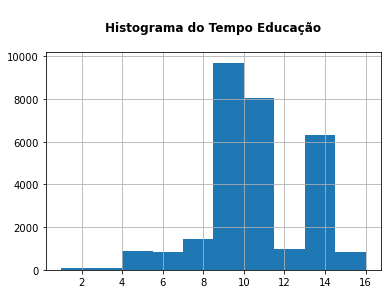

In [15]:
plt.title("\nHistograma do Tempo Educação\n",{'fontweight':'bold'})
df_limpo['tempo_educacao'].hist()


In [16]:
X = df_limpo.tempo_educacao.values
M = np.max(X)
m = np.min(X)
X_minmax = (X - m) / (M-m)

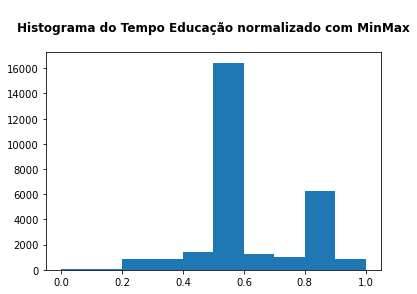

In [17]:
plt.title("\nHistograma do Tempo Educação normalizado com MinMax\n",{'fontweight':'bold'})
plt.hist(X_minmax)
plt.show()

### *7.2 - Normalização StandardScaler*

<AxesSubplot:title={'center':'\nHistograma da horas por semana\n'}>

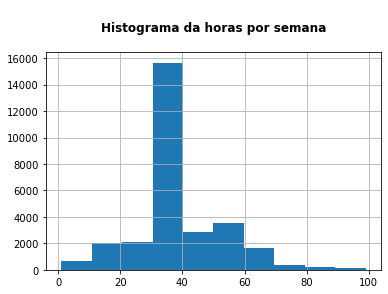

In [18]:
plt.title("\nHistograma da horas por semana\n",{'fontweight':'bold'})
df.horas_por_semana.hist()

In [19]:
X = df.horas_por_semana.values
Md = np.mean(X)
S = np.std(X)
X_standard = (X - Md) / S

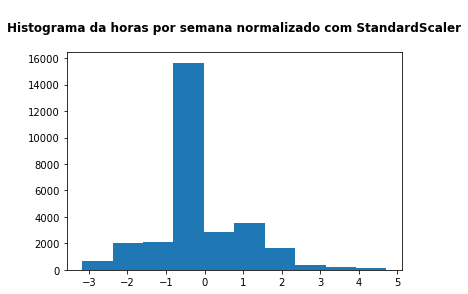

In [20]:
plt.title("\nHistograma da horas por semana normalizado com StandardScaler\n",{'fontweight':'bold'})
plt.hist(X_standard)
plt.show()

### *8 - One Hot Encoding*

In [21]:
ohe1 = OneHotEncoder()
ohe2 = OneHotEncoder()
ohe3 = OneHotEncoder()

In [22]:
dff_hot = df.copy()

In [23]:
variavel_ohe1 = dff_hot.estado_civil.values.reshape(-1,1)
variavel_ohe2 = dff_hot.cor.values.reshape(-1,1)
variavel_ohe3 = dff_hot.sexo.values.reshape(-1,1)

ohe1.fit(variavel_ohe1)
ohe2.fit(variavel_ohe2)
ohe3.fit(variavel_ohe3)

OneHotEncoder()

In [24]:
ohe1.transform(variavel_ohe1)
ohe2.transform(variavel_ohe2)
ohe3.transform(variavel_ohe3)

<29170x3 sparse matrix of type '<class 'numpy.float64'>'
	with 29170 stored elements in Compressed Sparse Row format>

In [25]:
ohe1.transform(variavel_ohe1).toarray()
ohe2.transform(variavel_ohe2).toarray()
ohe3.transform(variavel_ohe3).toarray()

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [26]:
ohe1.categories_

[array(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse',
        'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed'],
       dtype=object)]

In [27]:
ohe2.categories_

[array(['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other',
        'White'], dtype=object)]

In [28]:
ohe3.categories_

[array(['Female', 'Male', 'Outros'], dtype=object)]

In [29]:
dataframe_OHE1 = pd.DataFrame(ohe1.transform(variavel_ohe1).toarray(), 
                             columns = ohe1.categories_[0].tolist())
dataframe_OHE1

,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
29165,0.0,0.0,1.0,0.0,0.0,0.0,0.0
29166,0.0,0.0,1.0,0.0,0.0,0.0,0.0
29167,0.0,0.0,0.0,0.0,0.0,0.0,1.0
29168,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [30]:
dataframe_OHE2 = pd.DataFrame(ohe2.transform(variavel_ohe2).toarray(), 
                             columns = ohe2.categories_[0].tolist())
dataframe_OHE2

,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
29165,0.0,0.0,0.0,0.0,1.0
29166,0.0,0.0,0.0,0.0,1.0
29167,0.0,0.0,0.0,0.0,1.0
29168,0.0,0.0,0.0,0.0,1.0


In [31]:
dataframe_OHE3 = pd.DataFrame(ohe3.transform(variavel_ohe3).toarray(), 
                             columns = ohe3.categories_[0].tolist())
dataframe_OHE3

,Female,Male,Outros
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,1.0,0.0,0.0
...,...,...,...
29165,1.0,0.0,0.0
29166,0.0,1.0,0.0
29167,1.0,0.0,0.0
29168,0.0,1.0,0.0


### *9 - Outliears*

In [32]:
dfo = pd.read_csv("dataframe_exercicio_modulo_7.csv")
dfo

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual,nome,dívida
0,39.0,13,Never-married,White,Male,40,<=50K,NaN,NaN
1,50.0,13,Married-civ-spouse,White,Male,13,<=50K,NaN,NaN
2,38.0,9,Divorced,White,Male,40,<=50K,NaN,NaN
3,53.0,7,Married-civ-spouse,Black,Male,40,<=50K,NaN,NaN
4,37.0,14,Married-civ-spouse,White,Female,40,<=50K,NaN,NaN
...,...,...,...,...,...,...,...,...,...
29165,27.0,12,Married-civ-spouse,White,Female,38,<=50K,NaN,NaN
29166,40.0,9,Married-civ-spouse,White,Male,40,>50K,NaN,NaN
29167,58.0,9,Widowed,White,Female,40,<=50K,NaN,NaN
29168,22.0,9,Never-married,White,Male,20,<=50K,NaN,NaN


In [33]:
dfo_limpo = preprocessamento(dfo,['idade','tempo_educacao','horas_por_semana','divida'],['estado_civil','cor','sexo','salario_anual','nome'])
dfo_limpo.head()

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual
0,39.0,13,Never-married,White,Male,40,<=50K
1,50.0,13,Married-civ-spouse,White,Male,13,<=50K
2,38.0,9,Divorced,White,Male,40,<=50K
3,53.0,7,Married-civ-spouse,Black,Male,40,<=50K
4,37.0,14,Married-civ-spouse,White,Female,40,<=50K


<AxesSubplot:title={'center':'BOXPLOT Original'}>

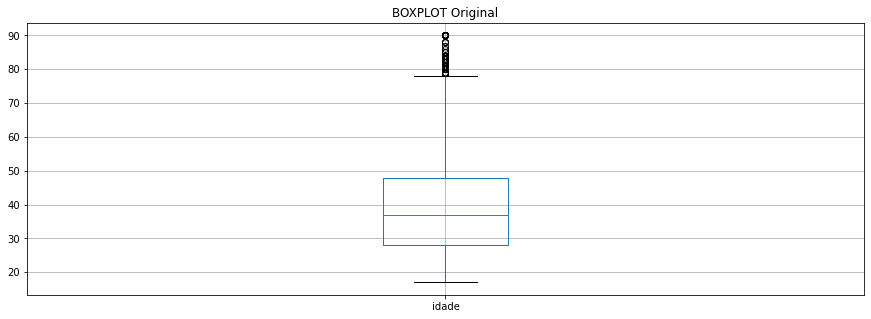

In [34]:
plt.figure(figsize=[15,5])
plt.title("BOXPLOT Original")
dfo_limpo.boxplot('idade')

In [35]:
def detecta_outlier(x, limite = 1.5):
    iqr = np.percentile(x, 75) - np.percentile(x, 25)
    limite_inf = np.maximum(np.percentile(x, 25) - limite * iqr, np.min(x))
    limite_sup = np.minimum(np.percentile(x, 75) + limite * iqr, np.max(x))
    return np.where((x < limite_inf) | (x > limite_sup), 1, 0)

In [36]:
dfo_limpo['outlier'] = detecta_outlier(dfo_limpo['idade'])
dfo_limpo

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual,outlier
0,39.0,13,Never-married,White,Male,40,<=50K,0
1,50.0,13,Married-civ-spouse,White,Male,13,<=50K,0
2,38.0,9,Divorced,White,Male,40,<=50K,0
3,53.0,7,Married-civ-spouse,Black,Male,40,<=50K,0
4,37.0,14,Married-civ-spouse,White,Female,40,<=50K,0
...,...,...,...,...,...,...,...,...
29165,27.0,12,Married-civ-spouse,White,Female,38,<=50K,0
29166,40.0,9,Married-civ-spouse,White,Male,40,>50K,0
29167,58.0,9,Widowed,White,Female,40,<=50K,0
29168,22.0,9,Never-married,White,Male,20,<=50K,0


In [37]:
dfo_limpo_outlier = dfo_limpo.loc[(dfo_limpo.outlier == 0)]

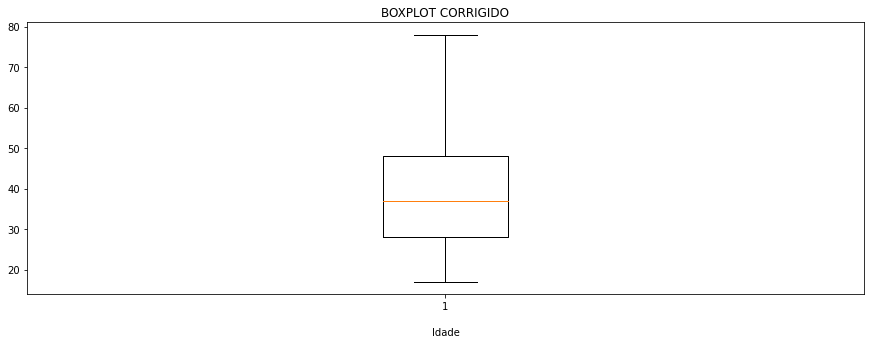

In [38]:
plt.figure(figsize=[15,5])
plt.title("BOXPLOT CORRIGIDO")
plt.boxplot(dfo_limpo_outlier.idade)
plt.xlabel('\nIdade')
plt.show()

<AxesSubplot:title={'center':'SEM OUTLIERS'}>

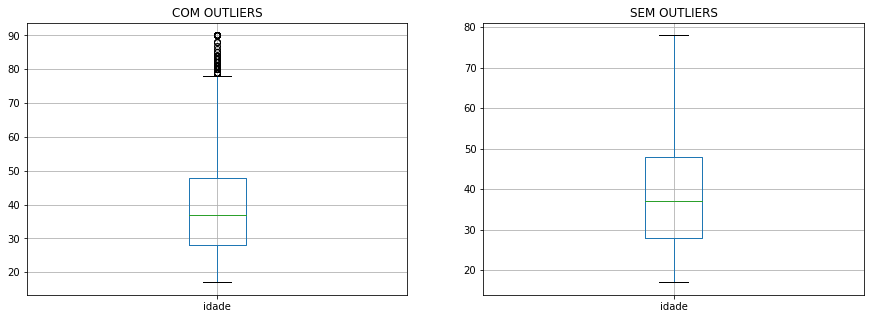

In [39]:
fig, ax = plt.subplots(1,2, figsize=[15,5])
ax[0].set_title("COM OUTLIERS")
df_limpo.boxplot('idade',ax=ax[0])
ax[1].set_title("SEM OUTLIERS")
dfo_limpo_outlier.boxplot('idade', ax=ax[1])

### *10 - CRIAR UMA FUNÇÃO*

In [40]:
df_original = pd.read_csv("dataframe_exercicio_modulo_7.csv")
df_original

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual,nome,dívida
0,39.0,13,Never-married,White,Male,40,<=50K,NaN,NaN
1,50.0,13,Married-civ-spouse,White,Male,13,<=50K,NaN,NaN
2,38.0,9,Divorced,White,Male,40,<=50K,NaN,NaN
3,53.0,7,Married-civ-spouse,Black,Male,40,<=50K,NaN,NaN
4,37.0,14,Married-civ-spouse,White,Female,40,<=50K,NaN,NaN
...,...,...,...,...,...,...,...,...,...
29165,27.0,12,Married-civ-spouse,White,Female,38,<=50K,NaN,NaN
29166,40.0,9,Married-civ-spouse,White,Male,40,>50K,NaN,NaN
29167,58.0,9,Widowed,White,Female,40,<=50K,NaN,NaN
29168,22.0,9,Never-married,White,Male,20,<=50K,NaN,NaN


In [41]:
df_original.dtypes

idade               float64
tempo_educacao        int64
estado_civil         object
cor                  object
sexo                 object
horas_por_semana      int64
salario_anual        object
nome                float64
dívida              float64
dtype: object

In [42]:
def gustavo(df_original):
    col_num = list(df_original.dtypes[df_original.dtypes == 'float64'].index.tolist())
    col_categ = list(df_original.dtypes[df_original.dtypes == 'object'].index.tolist())

    dff = pd.DataFrame(df_original.copy())
    temp = (dff.isnull().sum()/dff.shape[0])>=0.8
    variavel_80 = temp.loc[temp == True].index.tolist()
    
    for v in variavel_80:
        dff = dff.drop(v,axis=1)
    
    col_num = list(set(col_num).intersection(set(dff.columns.tolist())))
    col_categ = list(set(col_categ).intersection(set(dff.columns.tolist())))
    
    for v in col_num:
        dff[v] = dff[v].fillna(dff[v].mean())
    
    for v in col_categ:
        mode_v = dff[v].value_counts().idxmax()
        dff[v] = dff[v].fillna(mode_v)
    
    X1 = dff.tempo_educacao.values
    M = np.max(X1)
    m = np.min(X1)
    X_minmax = (X1 - m) / (M-m)
    
    X2 = dff.horas_por_semana.values
    Md = np.mean(X2)
    S = np.std(X2)
    X_standard = (X2 - Md) / S

    ohe1 = OneHotEncoder()
    ohe2 = OneHotEncoder()
    ohe3 = OneHotEncoder()
        
    dff_hot = dff.copy()
       
    variavel_ohe1 = dff_hot.estado_civil.values.reshape(-1,1)
    variavel_ohe2 = dff_hot.cor.values.reshape(-1,1)
    variavel_ohe3 = dff_hot.sexo.values.reshape(-1,1)

    ohe1.fit(variavel_ohe1)
    ohe2.fit(variavel_ohe2)
    ohe3.fit(variavel_ohe3)
        
    ohe1.transform(variavel_ohe1)
    ohe2.transform(variavel_ohe2)
    ohe3.transform(variavel_ohe3)
        
    ohe1.transform(variavel_ohe1).toarray()
    ohe2.transform(variavel_ohe2).toarray()
    ohe3.transform(variavel_ohe3).toarray()
        
    dataframe_OHE1 = pd.DataFrame(ohe1.transform(variavel_ohe1).toarray(), 
                            columns = ohe1.categories_[0].tolist())
    dataframe_OHE2 = pd.DataFrame(ohe2.transform(variavel_ohe2).toarray(), 
                            columns = ohe2.categories_[0].tolist())
    dataframe_OHE3 = pd.DataFrame(ohe3.transform(variavel_ohe3).toarray(), 
                            columns = ohe3.categories_[0].tolist())
        
        
    dff = pd.concat([dff, dataframe_OHE1,dataframe_OHE2,dataframe_OHE3], axis = 1)
        
    iqr = np.percentile(dff.idade, 75) - np.percentile(dff.idade, 25)
    limite_inf = np.maximum(np.percentile(dff.idade, 25) - 1.5 * iqr, np.min(dff.idade))
    limite_sup = np.minimum(np.percentile(dff.idade, 75) + 1.5 * iqr, np.max(dff.idade))
        
    L3 = np.where((dff.idade < limite_inf) | (dff.idade > limite_sup), 1, 0)
        
    dff['outlier'] = L3
        
    df_modificado = dff.loc[(dff.outlier == 0)]
        
    return df_modificado,X_minmax,X_standard


In [43]:
df_modificado,min_max,standard = gustavo(df_original)

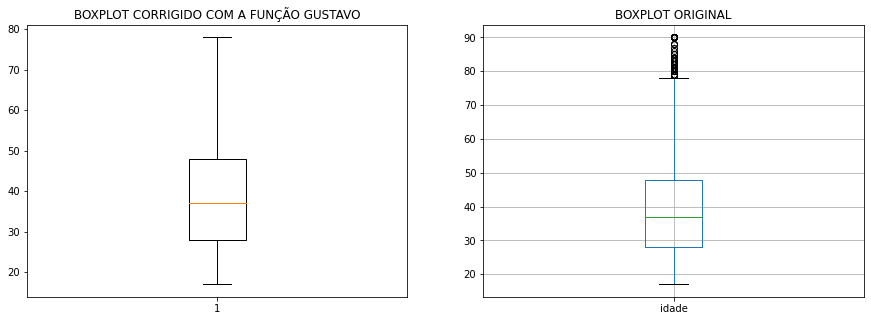

In [44]:
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
plt.title("BOXPLOT CORRIGIDO COM A FUNÇÃO GUSTAVO")
plt.boxplot(df_modificado.idade)
plt.subplot(1,2,2)
plt.title("BOXPLOT ORIGINAL")
df_original.boxplot('idade')
plt.show()
plt.show()

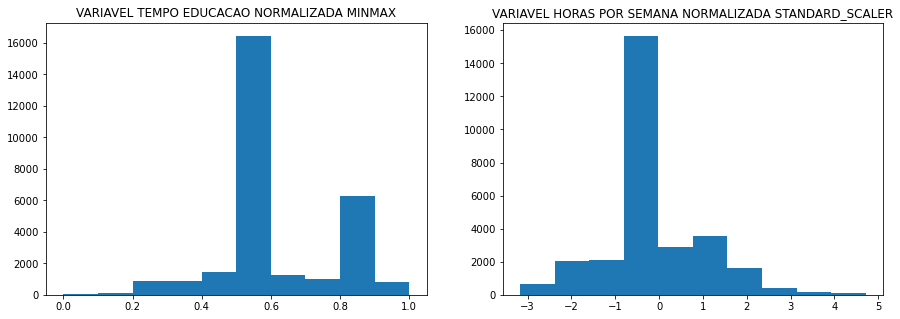

In [48]:
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
plt.title("VARIAVEL TEMPO EDUCACAO NORMALIZADA MINMAX")
plt.hist(min_max)
plt.subplot(1,2,2)
plt.title("VARIAVEL HORAS POR SEMANA NORMALIZADA STANDARD_SCALER")
plt.hist(standard)
plt.show()